In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from dotenv import load_dotenv
from tueplots import bundles
from tueplots.constants.color import rgb
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import plotly.graph_objects as go


In [3]:
final_df = pd.read_csv('../dat/all-data-best-city.csv', index_col=0)

In [4]:
#os.getenv("DATASET_PATH")

In [5]:
#final_df = pd.read_csv(os.getenv("DATASET_PATH"), index_col=0)

In [6]:
final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852


In [7]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng'],
      dtype='object')

In [8]:
#final_df = final_df.drop(['rank_cost_living', 'rank_traffic','rank_safety'], axis=1)
#final_df.head()

In [9]:
# Define variables for best mean temperature and best std deviation value
best_mean_tmp = 15
best_std_dev_tmp = 5

In [10]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng'],
      dtype='object')

In [11]:
# Min-Max Scaling all our indexes
final_df['scaled_cost_live_rent_index'] = 1 - ( (final_df['cost_live_rent_index'] - final_df['cost_live_rent_index'].min()) /
                                           (final_df['cost_live_rent_index'].max() - final_df['cost_live_rent_index'].min()) )
final_df['scaled_purchase_pow_index'] = ( (final_df['purchase_pow_index'] - final_df['purchase_pow_index'].min()) /
                                           (final_df['purchase_pow_index'].max() - final_df['purchase_pow_index'].min()) )
final_df['scaled_safety_index'] = ( (final_df['safety_index'] - final_df['safety_index'].min()) /
                                           (final_df['safety_index'].max() - final_df['safety_index'].min()) )
final_df['scaled_pollution_index'] = 1 - ( (final_df['pollution_index'] - final_df['pollution_index'].min()) /
                                           (final_df['pollution_index'].max() - final_df['pollution_index'].min()) )
final_df['scaled_trffic_min_index'] = 1 - ( (final_df['trffic_min_index'] - final_df['trffic_min_index'].min()) /
                                           (final_df['trffic_min_index'].max() - final_df['trffic_min_index'].min()) )
final_df['scaled_mean_tmp'] = ( (final_df['mean_tmp'] - final_df['mean_tmp'].min()) /
                                           (final_df['mean_tmp'].max() - final_df['mean_tmp'].min()) )
final_df['scaled_tmp_std_dev'] = ( (final_df['std_dev_temp'] - final_df['std_dev_temp'].min()) /
                                           (final_df['std_dev_temp'].max() - final_df['std_dev_temp'].min()) )

scaled_mean_tmp_mean_for_new_pt = final_df['scaled_mean_tmp'].mean()
scaled_mean_tmp_stdev_for_new_pt = final_df['scaled_mean_tmp'].std()

scaled_stdev_tmp_mean_for_new_pt = final_df['scaled_tmp_std_dev'].mean()
scaled_stdev_tmp_stdev_for_new_pt = final_df['scaled_tmp_std_dev'].std()

final_df = final_df.drop(['cost_live_rent_index', 'purchase_pow_index', 'safety_index', 'pollution_index',
                          'trffic_min_index'],
                         axis=1)
# Standardizing = (x-mean)/std for PCA - Important as sklearn PCA only centers data
# It does not divide by std dev, so need to do it manually so all individual feature
# variances are set to 1, as PCA is sensitive (depends) on Variances
final_df['scaled_cost_live_rent_index'] = ( (final_df['scaled_cost_live_rent_index'] - final_df['scaled_cost_live_rent_index'].mean()) /
                                           final_df['scaled_cost_live_rent_index'].std() )
final_df['scaled_purchase_pow_index'] = ( (final_df['scaled_purchase_pow_index'] - final_df['scaled_purchase_pow_index'].mean()) /
                                           final_df['scaled_purchase_pow_index'].std() )
final_df['scaled_safety_index'] = ( (final_df['scaled_safety_index'] - final_df['scaled_safety_index'].mean()) /
                                           final_df['scaled_safety_index'].std() )
final_df['scaled_pollution_index'] = ( (final_df['scaled_pollution_index'] - final_df['scaled_pollution_index'].mean()) /
                                           final_df['scaled_pollution_index'].std() )
final_df['scaled_trffic_min_index'] = ( (final_df['scaled_trffic_min_index'] - final_df['scaled_trffic_min_index'].mean()) /
                                           final_df['scaled_trffic_min_index'].std() )
final_df['scaled_mean_tmp'] = ( (final_df['scaled_mean_tmp'] - final_df['scaled_mean_tmp'].mean()) /
                                           final_df['scaled_mean_tmp'].std() )
final_df['scaled_tmp_std_dev'] = ( (final_df['scaled_tmp_std_dev'] - final_df['scaled_tmp_std_dev'].mean()) /
                                           final_df['scaled_tmp_std_dev'].std() )
final_df.head()

,city_ascii,country,mean_tmp,std_dev_temp,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
0,Honolulu,United States,25.441667,1.837220,21.3294,-157.8460,-1.893426,0.192068,-0.160940,0.704606,-0.319090,1.501799,-1.536880
1,Seattle,United States,11.316667,5.142662,47.6211,-122.3244,-2.052880,1.244113,-0.620860,0.814225,-0.909155,-0.990130,-0.133273
2,Canberra,Australia,13.141667,5.418396,-35.2931,149.1269,-1.292818,0.028073,1.132169,1.224105,-0.515778,-0.668164,-0.016187
3,Adelaide,Australia,17.208333,4.416798,-34.9275,138.6000,-1.053637,-0.027624,0.778897,1.176445,-0.712467,0.049276,-0.441500
4,Boston,United States,12.063636,8.341855,42.3188,-71.0852,-1.978468,1.188417,0.305646,0.928611,-0.865446,-0.858350,1.225217


In [12]:
final_df.describe()

,mean_tmp,std_dev_temp,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
count,124.000000,124.000000,124.000000,124.000000,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,16.929022,5.456515,26.269406,6.210760,1.307198e-16,7.520866e-17,1.916030e-16,8.595275e-17,-2.600966e-16,2.399514e-16,-3.805200e-17
std,5.668299,2.354963,28.471539,79.900214,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,9.133333,0.399621,-41.288900,-157.846000,-2.393048e+00,-1.754215e+00,-2.467207e+00,-1.997743e+00,-3.149217e+00,-1.375314e+00,-2.147335e+00
25%,12.051894,3.910059,19.344000,-71.704325,-8.211006e-01,-9.829735e-01,-6.208601e-01,-7.442721e-01,-5.731456e-01,-8.604219e-01,-6.566796e-01
50%,15.822500,5.658067,36.896650,16.177900,2.538828e-01,5.901534e-02,-3.096238e-02,4.927478e-02,7.428686e-02,-1.952124e-01,8.558600e-02
75%,20.875000,7.495350,45.477400,50.223625,8.664506e-01,7.753343e-01,7.972274e-01,8.749925e-01,7.790868e-01,6.961486e-01,8.657611e-01
max,28.600000,10.296734,59.950000,174.777200,1.800583e+00,2.438494e+00,1.992020e+00,1.700710e+00,1.986535e+00,2.058991e+00,2.055327e+00


In [13]:
final_df.dtypes

city_ascii                      object
country                         object
mean_tmp                       float64
std_dev_temp                   float64
lat                            float64
lng                            float64
scaled_cost_live_rent_index    float64
scaled_purchase_pow_index      float64
scaled_safety_index            float64
scaled_pollution_index         float64
scaled_trffic_min_index        float64
scaled_mean_tmp                float64
scaled_tmp_std_dev             float64
dtype: object

In [14]:
print("Range of Mean temperature:",final_df['mean_tmp'].max(), final_df['mean_tmp'].min())
print("Range of Std Dev of Temperature:",final_df['std_dev_temp'].max(), final_df['std_dev_temp'].min())

mean_tmp_range = final_df['mean_tmp'].max() - final_df['mean_tmp'].min()
std_dev_temp_range = final_df['std_dev_temp'].max() - final_df['std_dev_temp'].min()

scaled_best_mean_tmp = (best_mean_tmp - final_df['mean_tmp'].min()) / mean_tmp_range
scaled_best_std_dev_tmp = (best_std_dev_tmp - final_df['std_dev_temp'].min()) / std_dev_temp_range

# Normalize the new point
scaled_best_mean_tmp = ( (scaled_best_mean_tmp - scaled_mean_tmp_mean_for_new_pt) /
                                           scaled_mean_tmp_stdev_for_new_pt )
scaled_best_std_dev_tmp = ( (scaled_best_std_dev_tmp - scaled_stdev_tmp_mean_for_new_pt) /
                                           scaled_stdev_tmp_stdev_for_new_pt )
print(scaled_best_mean_tmp, scaled_best_std_dev_tmp)

Range of Mean temperature: 28.600000000000005 9.133333333333336
Range of Std Dev of Temperature: 10.296733815765428 0.3996210326008498
-0.340317642475509 -0.19385230468929138


In [15]:
# For a new point
new_point = np.array([[0.35,0.5,0.65,0.6,0.75,scaled_best_mean_tmp,scaled_best_std_dev_tmp]])

In [16]:
# prep data
train_df = final_df.drop(['mean_tmp','std_dev_temp','lat','lng','country'],axis=1)
train_df = train_df.set_index('city_ascii')
train_df.head()

,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
city_ascii,,,,,,,
Honolulu,-1.893426,0.192068,-0.160940,0.704606,-0.319090,1.501799,-1.536880
Seattle,-2.052880,1.244113,-0.620860,0.814225,-0.909155,-0.990130,-0.133273
Canberra,-1.292818,0.028073,1.132169,1.224105,-0.515778,-0.668164,-0.016187
Adelaide,-1.053637,-0.027624,0.778897,1.176445,-0.712467,0.049276,-0.441500
Boston,-1.978468,1.188417,0.305646,0.928611,-0.865446,-0.858350,1.225217


In [17]:
train_df.columns

Index(['scaled_cost_live_rent_index', 'scaled_purchase_pow_index',
       'scaled_safety_index', 'scaled_pollution_index',
       'scaled_trffic_min_index', 'scaled_mean_tmp', 'scaled_tmp_std_dev'],
      dtype='object')

In [18]:
"""
# Function to calculate Euclidean distance in 7D space
# Method drop bc of Curse of Dimensionality
# Calculate distances in 7D space

# Convert new_point to a 1-D array
new_point = new_point.flatten()

# Initialize an empty list to store the distances
distances = []

# Calculate Euclidean distance for each point in the dataframe
for index, row in train_df.iterrows():
    distance = np.sqrt(np.sum((row - new_point) ** 2))
    distances.append(distance)

# Create a new dataframe with distances
df_distances = pd.DataFrame(distances, columns=['Distance'], index=train_df.index)

# Sort the dataframe by distance
df_distances = df_distances.sort_values(by='Distance')

# Print the sorted dataframe
print(df_distances)
"""

"\n# Function to calculate Euclidean distance in 7D space\n# Method drop bc of Curse of Dimensionality\n# Calculate distances in 7D space\n\n# Convert new_point to a 1-D array\nnew_point = new_point.flatten()\n\n# Initialize an empty list to store the distances\ndistances = []\n\n# Calculate Euclidean distance for each point in the dataframe\nfor index, row in train_df.iterrows():\n    distance = np.sqrt(np.sum((row - new_point) ** 2))\n    distances.append(distance)\n\n# Create a new dataframe with distances\ndf_distances = pd.DataFrame(distances, columns=['Distance'], index=train_df.index)\n\n# Sort the dataframe by distance\ndf_distances = df_distances.sort_values(by='Distance')\n\n# Print the sorted dataframe\nprint(df_distances)\n"

### Trying to reduce dimensions with PCA first and then calculate closest euclidean distance.
### Doing this to avoid the "curse of dimensionality" which suggests, as dimensions increase the volume increases so fast that the points become sparse and the distances become very similar, hence obstructing the evaluation of actual similarities.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/g7/v0pkv9vx64n8xw87qzl85ms00000gn/T/ipykernel_54590/3351324750.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


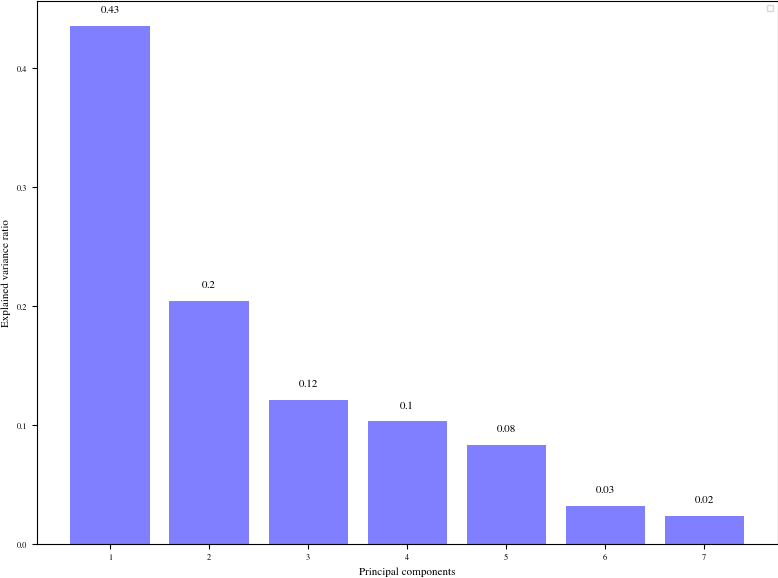

In [19]:
data = train_df.values


pca = PCA(n_components=7)
X_pca = pca.fit_transform(data)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_


plt.rcParams.update(bundles.icml2022(column="half", nrows=8, ncols=6, usetex=False))
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(range(1,8), explained_variance, alpha=0.5, align='center', color='blue')

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
    
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pca_explained_variance.pdf')
plt.show()


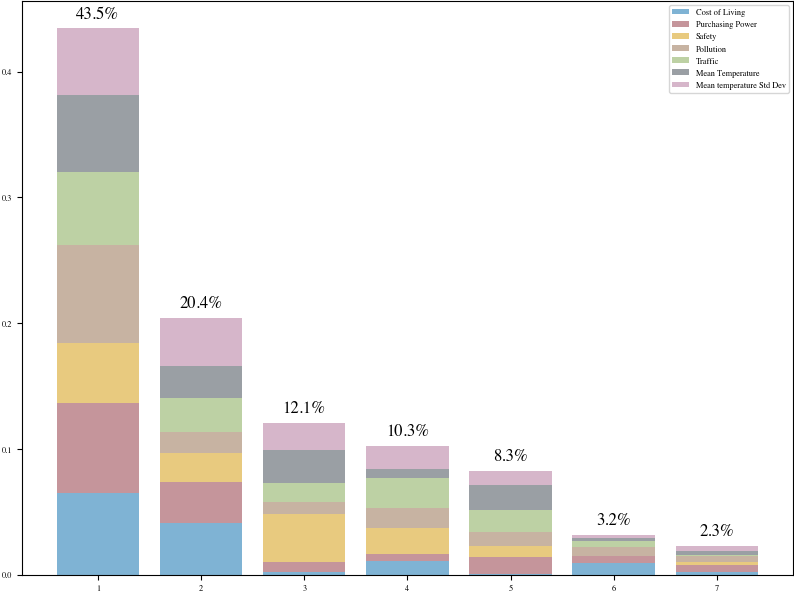

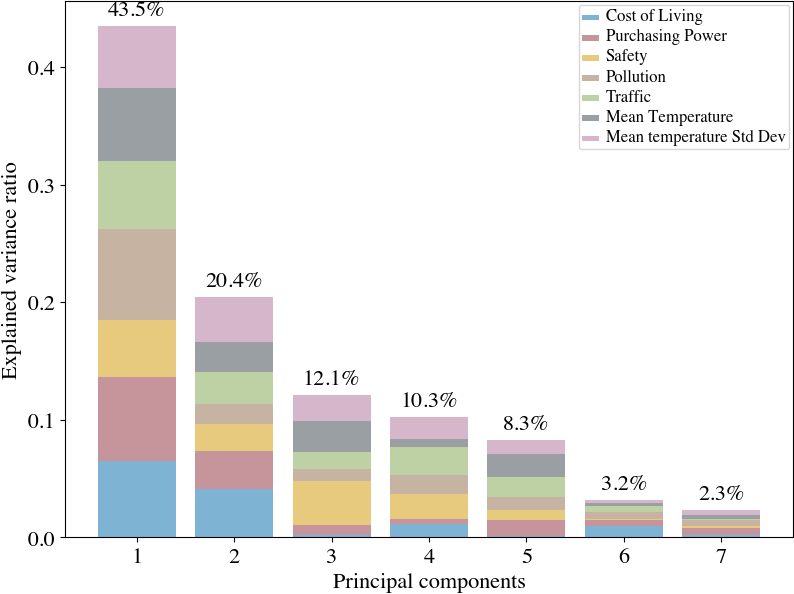

In [36]:
data = train_df.values


pca = PCA(n_components=7)
X_pca = pca.fit_transform(data)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the contribution of each feature to each principal component
feature_contribution = np.abs(pca.components_)

# Normalize the feature contributions so they sum to 1
normalized_feature_contribution = feature_contribution / np.sum(feature_contribution, axis=1)[:, np.newaxis]

# Multiply the normalized feature contributions by the explained variance
weighted_feature_contribution = normalized_feature_contribution * explained_variance[:, np.newaxis]


colors = [rgb.tue_blue, rgb.tue_red, rgb.tue_orange, rgb.tue_brown, rgb.tue_green, rgb.tue_dark, rgb.tue_violet]


plt.rcParams.update(bundles.icml2022(column="half", nrows=8, ncols=6, usetex=False))
fig, ax = plt.subplots(figsize=(8,6))


for i in range(weighted_feature_contribution.shape[1]):
    ax.bar(range(1,8), weighted_feature_contribution[:,i], bottom=np.sum(weighted_feature_contribution[:,:i], axis=1), alpha=0.5, align='center', color=colors[i])

# Add labels on top of the bars
for i, v in enumerate(explained_variance):
    ax.text(i+1, v+0.005, f"{v*100:.1f}%", ha='center', va='bottom', fontsize=12)

# Define the feature name dictionary
feature_name_dict = {'scaled_cost_live_rent_index':'Cost of Living', 'scaled_purchase_pow_index':'Purchasing Power',
       'scaled_safety_index':'Safety', 'scaled_pollution_index':'Pollution',
       'scaled_trffic_min_index':'Traffic', 'scaled_mean_tmp':'Mean Temperature', 'scaled_tmp_std_dev':'Mean temperature Std Dev'}

# Update the legend using the feature name dictionary
legend = plt.legend([feature_name_dict.get(col, col) for col in train_df.columns], loc='best')

data = train_df.values


pca = PCA(n_components=7)
X_pca = pca.fit_transform(data)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the contribution of each feature to each principal component
feature_contribution = np.abs(pca.components_)

# Normalize the feature contributions so they sum to 1
normalized_feature_contribution = feature_contribution / np.sum(feature_contribution, axis=1)[:, np.newaxis]

# Multiply the normalized feature contributions by the explained variance
weighted_feature_contribution = normalized_feature_contribution * explained_variance[:, np.newaxis]


colors = [rgb.tue_blue, rgb.tue_red, rgb.tue_orange, rgb.tue_brown, rgb.tue_green, rgb.tue_dark, rgb.tue_violet]


plt.rcParams.update(bundles.icml2022(column="half", nrows=8, ncols=6, usetex=False))
fig, ax = plt.subplots(figsize=(8,6))


for i in range(weighted_feature_contribution.shape[1]):
    ax.bar(range(1,8), weighted_feature_contribution[:,i], bottom=np.sum(weighted_feature_contribution[:,:i], axis=1), alpha=0.5, align='center', color=colors[i])

# Add labels on top of the bars
for i, v in enumerate(explained_variance):
    ax.text(i+1, v+0.005, f"{v*100:.1f}%", ha='center', va='bottom', fontsize=16)

# Define the feature name dictionary
feature_name_dict = {'scaled_cost_live_rent_index':'Cost of Living', 'scaled_purchase_pow_index':'Purchasing Power',
       'scaled_safety_index':'Safety', 'scaled_pollution_index':'Pollution',
       'scaled_trffic_min_index':'Traffic', 'scaled_mean_tmp':'Mean Temperature', 'scaled_tmp_std_dev':'Mean temperature Std Dev'}

# Update the legend using the feature name dictionary
legend = plt.legend([feature_name_dict.get(col, col) for col in train_df.columns], loc='best')

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16) 

plt.setp(legend.get_texts(), fontsize=12)
plt.ylabel('Explained variance ratio', fontsize=16)
plt.xlabel('Principal components', fontsize=16)
plt.savefig('pca_feature_contribution.pdf')
plt.show()


In [21]:
# Convert new_point to a 1-D array
new_point_loc = new_point.flatten()


pca = PCA(n_components=3)
train_df_pca = pca.fit_transform(train_df)

# Transform the new_point using the same PCA object
new_point_pca = pca.transform(new_point_loc.reshape(1, -1))

distances = []

# Calculate Euclidean distance for each point in the dataframe
for point in train_df_pca:
    distance = np.sqrt(np.sum((point - new_point_pca) ** 2))
    distances.append(distance)


df_distances = pd.DataFrame(distances, columns=['Distance'], index=train_df.index)
df_distances = df_distances.sort_values(by='Distance')
df_distances.head(10)


/Users/kayoonkim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,Distance
city_ascii,
Tokyo,0.362672
Prague,0.795473
Montreal,0.867076
Porto,0.869924
Riyadh,0.880478
Valencia,0.935892
Edinburgh,0.942811
Lisbon,0.973539
Halifax,0.988977


In [22]:
# Storing PCA weights for use in new sample points
train_df_pca = pd.DataFrame(train_df_pca)
train_df_pca['city_ascii'] = train_df.index


train_df_pca.to_csv('train_df_pca.csv', index=False)

In [23]:
from joblib import dump, load

# Save the trained PCA model
dump(pca, 'pca_model.joblib')

['pca_model.joblib']

In [24]:
# Trying out the stored PCA weights 

train_df_pca = pd.read_csv('train_df_pca.csv')

city_ascii = train_df_pca['city_ascii'].to_list()

train_numpy_pca = train_df_pca.drop(['city_ascii'], axis=1).values

# Load the trained PCA model
pca_loaded = load('pca_model.joblib') 

# Convert new_point to a 1-D array
new_point_loc = new_point.flatten()

feature_names = ['scaled_cost_live_rent_index', 'scaled_purchase_pow_index',
                 'scaled_safety_index', 'scaled_pollution_index','scaled_trffic_min_index',
                 'scaled_mean_tmp', 'scaled_tmp_std_dev']

# Convert new point to dataframe with same column names as the dataframe on
# which PCA was trained, these are obtained from the Jupyter notebook under
# modelling section.
new_point_df = pd.DataFrame(new_point_loc.reshape(1, -1), columns=feature_names)

# Transform the new_point using the same PCA object
new_point_pca = pca_loaded.transform(new_point_df)

distances = []

# Calculate Euclidean distance for each point in the dataframe
for point in train_numpy_pca:
    distance = np.sqrt(np.sum((point - new_point_pca) ** 2))
    distances.append(distance)


df_distances = pd.DataFrame(distances, columns=['Distance'], index=city_ascii)
df_distances = df_distances.sort_values(by='Distance')
df_distances.head(10)

,Distance
Tokyo,0.362672
Prague,0.795473
Montreal,0.867076
Porto,0.869924
Riyadh,0.880478
Valencia,0.935892
Edinburgh,0.942811
Lisbon,0.973539
Halifax,0.988977
Warsaw,1.023940


In [25]:
print(new_point_pca)

[[-0.87468514 -0.31073387  0.61529508]]


In [26]:
train_df_pca.head()

,0,1,2,city_ascii
0,0.055315,2.557494,1.148883,Honolulu
1,-1.542263,1.974554,-1.225294,Seattle
2,-1.479851,0.582059,0.496239,Canberra
3,-0.767255,1.023691,0.716547,Adelaide
4,-2.210152,1.050126,-1.002660,Boston


In [27]:
# Create a trace for the original PCA transformed points
trace1 = go.Scatter3d(
    x=train_df_pca.iloc[:, 0],
    y=train_df_pca.iloc[:, 1],
    z=train_df_pca.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color='blue',                
        opacity=0.1                   
    ),
    text=train_df_pca['city_ascii'],  
    hoverinfo='text',
    name='Dataset Cities'
)

# Create a trace for the new point
trace2 = go.Scatter3d(
    x=[new_point_pca[0][0]],
    y=[new_point_pca[0][1]],
    z=[new_point_pca[0][2]],
    mode='markers',
    marker=dict(
        size=10,
        color='red',                
    ),
    name='Ideal City'
)

# Define the layout
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)


fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


In [28]:
df_distances['city_ascii'] = df_distances.index
finding_home_top_df = final_df.merge(df_distances, left_on='city_ascii', right_on='city_ascii', how='inner')
finding_home_top_df = finding_home_top_df.sort_values(by='Distance')
rnk = [i for i in range(1,finding_home_top_df.shape[0] + 1)]
finding_home_top_df['Rank'] = rnk
finding_home_top_df = finding_home_top_df.head(5)
finding_home_top_df.head()

,city_ascii,country,mean_tmp,std_dev_temp,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev,Distance,Rank
61,Tokyo,Japan,15.375000,7.586846,35.6897,139.6922,0.099744,0.634546,1.378793,0.437708,-0.559487,-0.274160,0.904613,0.362672,1
56,Prague,Czech Republic,11.400000,5.753694,50.0755,14.4378,-0.112861,-0.092603,1.358797,0.871418,0.740842,-0.975429,0.126193,0.795473,2
51,Montreal,Canada,13.225000,6.945039,45.5089,-73.5617,-0.224478,0.798541,0.878880,0.861886,-0.100547,-0.653463,0.632080,0.867076,3
80,Porto,Portugal,15.725000,4.050393,41.1621,-8.6220,0.466488,-0.241127,0.832221,1.147849,1.593158,-0.212413,-0.597089,0.869924,4
69,Riyadh,Saudi Arabia,25.833333,8.043443,24.6333,46.7167,0.381446,0.773787,1.258814,-0.553630,0.740842,1.570897,1.098500,0.880478,5


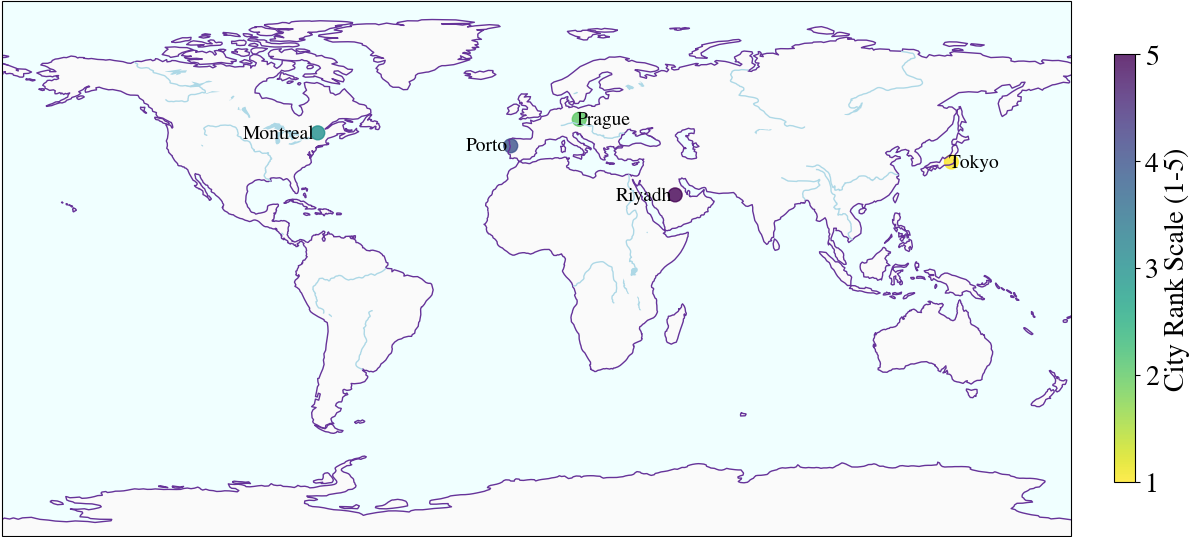

In [41]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=12, ncols=8, usetex=False))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND, facecolor=(0.98, 0.98, 0.98)) 
ax.add_feature(cfeature.OCEAN, facecolor='Azure')
ax.add_feature(cfeature.COASTLINE, edgecolor='RebeccaPurple')
ax.add_feature(cfeature.LAKES, facecolor='LightBlue')
ax.add_feature(cfeature.RIVERS, edgecolor='LightBlue')

# Scatter plot
sc = ax.scatter(finding_home_top_df['lng'], finding_home_top_df['lat'], 
                c=finding_home_top_df['Rank'], cmap='viridis_r', s=100, alpha=0.8, 
                transform=ccrs.PlateCarree())


for i, txt in enumerate(finding_home_top_df['city_ascii']):
    if txt == "Prague":
        ax.text(finding_home_top_df['lng'].iloc[i] - 1, finding_home_top_df['lat'].iloc[i], txt, 
                color='black', fontsize=14, ha='left', va='center', transform=ccrs.PlateCarree())
    elif txt == "Tokyo":
        ax.text(finding_home_top_df['lng'].iloc[i] - 1, finding_home_top_df['lat'].iloc[i], txt, 
                color='black', fontsize=14, ha='left', va='center', transform=ccrs.PlateCarree())
    else:
        ax.text(finding_home_top_df['lng'].iloc[i] - 1, finding_home_top_df['lat'].iloc[i], txt, 
            color='black', fontsize=14, ha='right', va='center', transform=ccrs.PlateCarree())

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, fraction=0.02, pad=0.04)
cbar.set_label('City Rank Scale (1-5)', fontsize=20)  
cbar.set_ticks(np.arange(1, 6))  
cbar.ax.tick_params(labelsize=20)

# Set the global extent
ax.set_global()

plt.show()
fig.savefig('top_5_cities_default_params.pdf')


In [30]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))


# Convert RGB to hexadecimal color codes
green = rgb_to_hex(rgb.tue_darkgreen)
red = rgb_to_hex(rgb.tue_red)

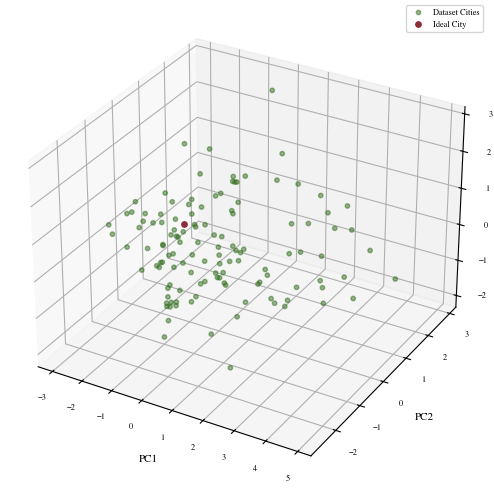

In [31]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=5, ncols=5, usetex=False))
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(projection='3d'))

# Create a scatter plot for the original PCA transformed points
ax.scatter(train_df_pca.iloc[:, 0], train_df_pca.iloc[:, 1], train_df_pca.iloc[:, 2], 
           color=green, alpha=0.5, s=10, label='Dataset Cities')

# Create a scatter plot for the new point
ax.scatter([new_point_pca[0][0]], [new_point_pca[0][1]], [new_point_pca[0][2]], 
           c=red, s=15, label='Ideal City')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.legend()

plt.savefig('3d-euclidean-pca.pdf')
plt.show()


In [32]:
train_df_pca.head()

,0,1,2,city_ascii
0,0.055315,2.557494,1.148883,Honolulu
1,-1.542263,1.974554,-1.225294,Seattle
2,-1.479851,0.582059,0.496239,Canberra
3,-0.767255,1.023691,0.716547,Adelaide
4,-2.210152,1.050126,-1.002660,Boston


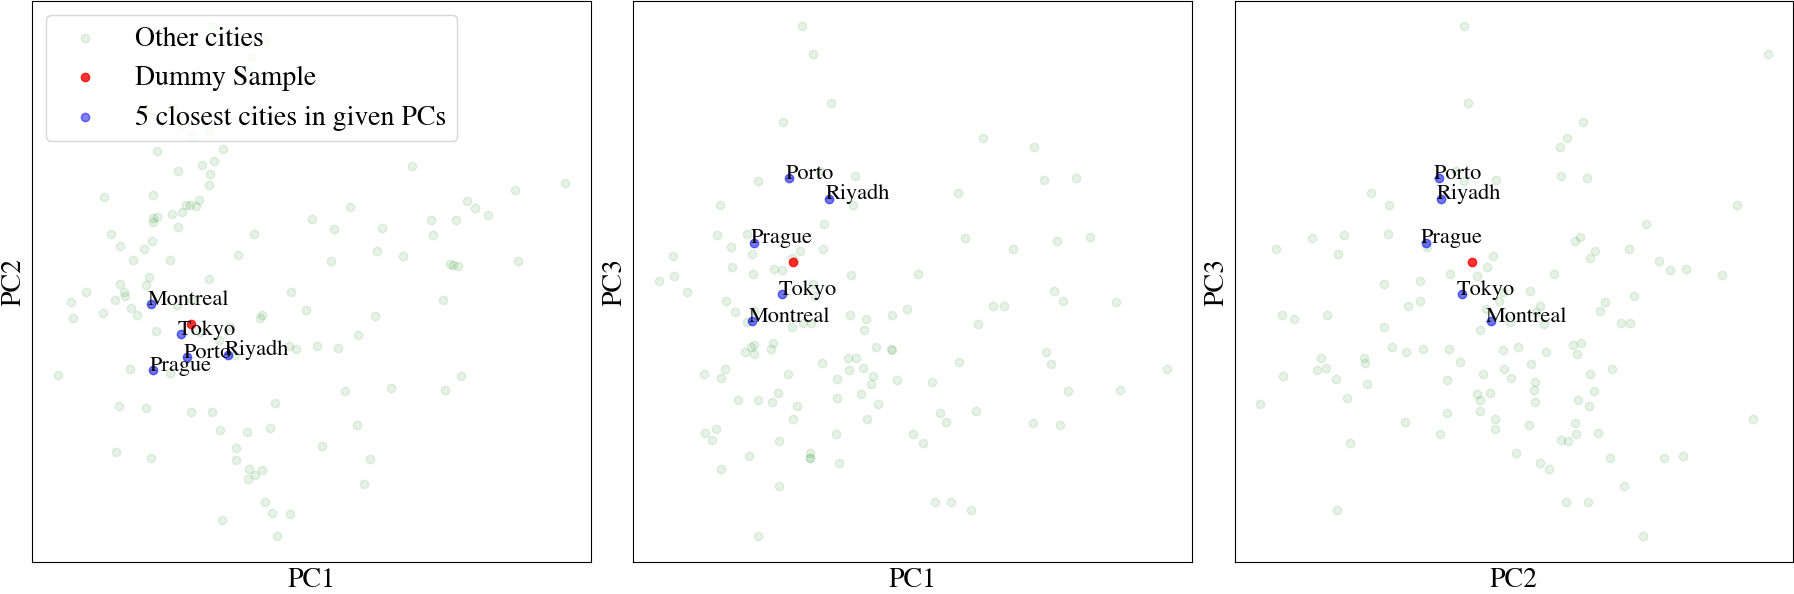

In [33]:
train_data = train_df_pca.iloc[:, :3].values  # Select only the first three columns (PCA components)
new_point = new_point_pca.reshape(1, -1)  # Reshape the new point to 2D array
city_names = train_df_pca['city_ascii'].values  # Get city names

distances = np.sqrt(np.sum((train_data - new_point)**2, axis=1))

# Get the indices of the 5 nearest neighbors
indices = np.argsort(distances)[:5]

# Create combinations for PCA components
combinations = [(0, 1), (0, 2), (1, 2)]
labels = [('PC1', 'PC2'), ('PC1', 'PC3'), ('PC2', 'PC3')]

plt.rcParams.update(bundles.icml2022(column="full", nrows=18, ncols=6, usetex=False))
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 3 subplots arranged horizontally

for i, ax in enumerate(axs):
    ax.scatter(train_data[:, combinations[i][0]], train_data[:, combinations[i][1]], color='green', alpha=0.1, label='Other cities')
    ax.scatter(new_point[:, combinations[i][0]], new_point[:, combinations[i][1]], color='red', alpha=0.8, label='Dummy Sample')
    ax.scatter(train_data[indices, combinations[i][0]], train_data[indices, combinations[i][1]], color='blue', alpha=0.5, label='5 closest cities in given PCs')  # Mark the 5 closest points
    for j in indices:
        ax.text(train_data[j, combinations[i][0]]-0.05, train_data[j, combinations[i][1]], city_names[j], fontsize=16)
    if i == 0:
        ax.legend(loc='upper left', fontsize=20)  
    ax.set_xlabel(labels[i][0], fontsize=20)
    ax.set_ylabel(labels[i][1], fontsize=20)
    ax.set_xticks([])  
    ax.set_yticks([])

#ax.legend(loc='best', fontsize=16) 


plt.savefig('pca-each-components-dummy.pdf')
plt.show()
